<a href="https://colab.research.google.com/github/ibacaraujo/to-tensorflow2/blob/master/explore_overfitting_and_underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# We need to strike a balance.

Understanding how to train for an appropriate number of epochs as we'll explore below is a useful skill.

Best way to prevent overfitting is more training data, more chance then to generalize better. If not possible, to use techniques like regularization. Two common ones in this notebook, weight regularization and dropout.

To improve IMDB movie review classification. Let me tune into it. Amazing.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

TensorFlow 2.x selected.
2.0.0-rc1


## Download the IMDB dataset

In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
  # Create an all-zero matrix of shape (len(sequences), dimension)
  results = np.zeros((len(sequences), dimension))
  for i, word_indices in enumerate(sequences):
    results[i, word_indices] = 1.0 # set specific indices of results[i] to 1s
  return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17465344/17464789 [==============================] - 0s 0us/step


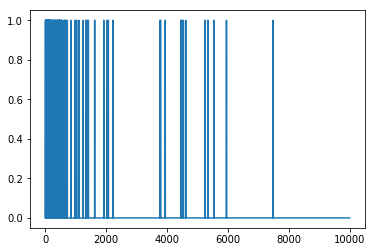

In [3]:
# Look at one multi-hot vectors
plt.plot(train_data[0])

In [4]:
# Look at label
print(train_labels[0])

1


## Demonstrate overfitting

There is no magical formula to determine the right size or architecture of your model. You will have to experiment using a series of different architectures.

Great.

To find an appropriate model size, it's best to start with relatively few layers and parameters, then begin increasing the size of the layers or adding new layers until you see diminishing returns on the validation loss. Ok, let's try this on our movie review classification network.

### Create a baseline model

In [6]:
# Create a simple model using only Dense layers as a baseline.
# Then create smaller and larger versions, and compare them.

baseline_model = keras.Sequential([
  # input_shape is only required here so that .summary works.
  keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [7]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.4911 - accuracy: 0.8151 - binary_crossentropy: 0.4911 - val_loss: 0.3478 - val_accuracy: 0.8724 - val_binary_crossentropy: 0.3478
Epoch 2/20
25000/25000 - 2s - loss: 0.2546 - accuracy: 0.9092 - binary_crossentropy: 0.2546 - val_loss: 0.2842 - val_accuracy: 0.8886 - val_binary_crossentropy: 0.2842
Epoch 3/20
25000/25000 - 2s - loss: 0.1863 - accuracy: 0.9356 - binary_crossentropy: 0.1863 - val_loss: 0.2886 - val_accuracy: 0.8856 - val_binary_crossentropy: 0.2886
Epoch 4/20
25000/25000 - 2s - loss: 0.1476 - accuracy: 0.9497 - binary_crossentropy: 0.1476 - val_loss: 0.3119 - val_accuracy: 0.8787 - val_binary_crossentropy: 0.3119
Epoch 5/20
25000/25000 - 2s - loss: 0.1223 - accuracy: 0.9598 - binary_crossentropy: 0.1223 - val_loss: 0.3491 - val_accuracy: 0.8716 - val_binary_crossentropy: 0.3491
Epoch 6/20
25000/25000 - 2s - loss: 0.1049 - accuracy: 0.9657 - binary_crossentropy: 0.1049 - val_loss: 0.3696

### Create a smaller model

In [8]:
smaller_model = keras.Sequential([
  keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
  keras.layers.Dense(4, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [9]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6110 - accuracy: 0.6510 - binary_crossentropy: 0.6110 - val_loss: 0.5523 - val_accuracy: 0.7456 - val_binary_crossentropy: 0.5523
Epoch 2/20
25000/25000 - 2s - loss: 0.5020 - accuracy: 0.8259 - binary_crossentropy: 0.5020 - val_loss: 0.5007 - val_accuracy: 0.8334 - val_binary_crossentropy: 0.5007
Epoch 3/20
25000/25000 - 2s - loss: 0.4517 - accuracy: 0.8816 - binary_crossentropy: 0.4517 - val_loss: 0.4737 - val_accuracy: 0.8622 - val_binary_crossentropy: 0.4737
Epoch 4/20
25000/25000 - 2s - loss: 0.4165 - accuracy: 0.9079 - binary_crossentropy: 0.4165 - val_loss: 0.4579 - val_accuracy: 0.8654 - val_binary_crossentropy: 0.4579
Epoch 5/20
25000/25000 - 2s - loss: 0.3874 - accuracy: 0.9268 - binary_crossentropy: 0.3874 - val_loss: 0.4451 - val_accuracy: 0.8748 - val_binary_crossentropy: 0.4451
Epoch 6/20
25000/25000 - 2s - loss: 0.3627 - accuracy: 0.9413 - binary_crossentropy: 0.3627 - val_loss: 0.4382

### Create a bigger model

In [3]:
bigger_model = keras.Sequential([
  keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5120512   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [4]:
bigger_history = bigger_model.fit(train_data,
                                  train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
25000/25000 - 4s - loss: 0.3440 - accuracy: 0.8482 - binary_crossentropy: 0.3440 - val_loss: 0.2983 - val_accuracy: 0.8772 - val_binary_crossentropy: 0.2983
Epoch 2/20
25000/25000 - 2s - loss: 0.1432 - accuracy: 0.9478 - binary_crossentropy: 0.1432 - val_loss: 0.3293 - val_accuracy: 0.8733 - val_binary_crossentropy: 0.3293
Epoch 3/20
25000/25000 - 2s - loss: 0.0470 - accuracy: 0.9867 - binary_crossentropy: 0.0470 - val_loss: 0.4414 - val_accuracy: 0.8712 - val_binary_crossentropy: 0.4414
Epoch 4/20
25000/25000 - 2s - loss: 0.0069 - accuracy: 0.9990 - binary_crossentropy: 0.0069 - val_loss: 0.5795 - val_accuracy: 0.8708 - val_binary_crossentropy: 0.5795
Epoch 5/20
25000/25000 - 2s - loss: 8.7494e-04 - accuracy: 1.0000 - binary_crossentropy: 8.7494e-04 - val_loss: 0.6811 - val_accuracy: 0.8717 - val_binary_crossentropy: 0.6811
Epoch 6/

### Plot the training and validation loss

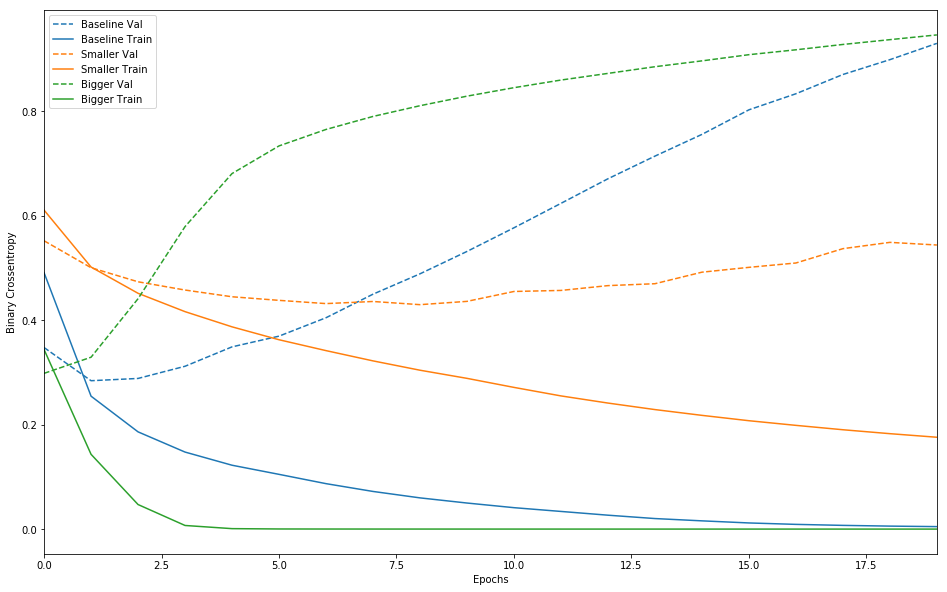

In [10]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

## Strategies to prevent overfitting

### Add weight regularization

In [11]:
l2_model = keras.models.Sequential([
  keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                     activation='relu', input_shape=(NUM_WORDS,)),
  keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                     activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data,
                                train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.5221 - accuracy: 0.8057 - binary_crossentropy: 0.4824 - val_loss: 0.3771 - val_accuracy: 0.8771 - val_binary_crossentropy: 0.3357
Epoch 2/20
25000/25000 - 2s - loss: 0.2999 - accuracy: 0.9111 - binary_crossentropy: 0.2541 - val_loss: 0.3329 - val_accuracy: 0.8889 - val_binary_crossentropy: 0.2837
Epoch 3/20
25000/25000 - 2s - loss: 0.2493 - accuracy: 0.9311 - binary_crossentropy: 0.1975 - val_loss: 0.3381 - val_accuracy: 0.8857 - val_binary_crossentropy: 0.2844
Epoch 4/20
25000/25000 - 2s - loss: 0.2278 - accuracy: 0.9415 - binary_crossentropy: 0.1722 - val_loss: 0.3517 - val_accuracy: 0.8816 - val_binary_crossentropy: 0.2947
Epoch 5/20
25000/25000 - 2s - loss: 0.2110 - accuracy: 0.9482 - binary_crossentropy: 0.1527 - val_loss: 0.3730 - val_accuracy: 0.8754 - val_binary_crossentropy: 0.3139
Epoch 6/20
25000/25000 - 2s - loss: 0.2008 - accuracy: 0.9543 - binary_crossentropy: 0.1405 - val_loss: 0.3839

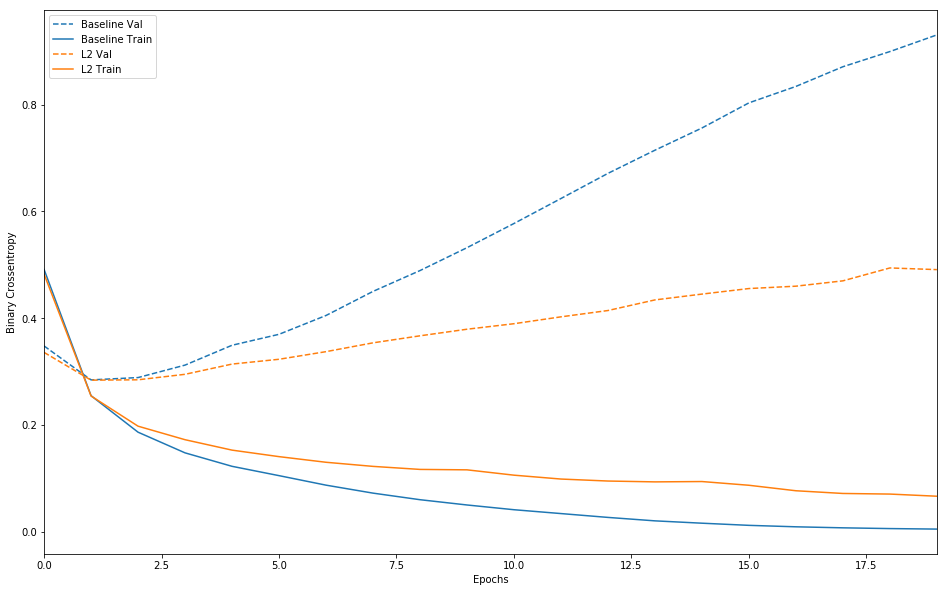

In [12]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

L2 model much more resistance to overfitting.

### Add dropout

In [14]:
dpt_model = keras.models.Sequential([
  keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6632 - accuracy: 0.5962 - binary_crossentropy: 0.6632 - val_loss: 0.5797 - val_accuracy: 0.8363 - val_binary_crossentropy: 0.5797
Epoch 2/20
25000/25000 - 2s - loss: 0.5404 - accuracy: 0.7500 - binary_crossentropy: 0.5404 - val_loss: 0.4071 - val_accuracy: 0.8701 - val_binary_crossentropy: 0.4071
Epoch 3/20
25000/25000 - 2s - loss: 0.4100 - accuracy: 0.8429 - binary_crossentropy: 0.4100 - val_loss: 0.3103 - val_accuracy: 0.8854 - val_binary_crossentropy: 0.3103
Epoch 4/20
25000/25000 - 2s - loss: 0.3234 - accuracy: 0.8872 - binary_crossentropy: 0.3234 - val_loss: 0.2837 - val_accuracy: 0.8894 - val_binary_crossentropy: 0.2837
Epoch 5/20
25000/25000 - 2s - loss: 0.2783 - accuracy: 0.9085 - binary_crossentropy: 0.2783 - val_loss: 0.2805 - val_accuracy: 0.8877 - val_binary_crossentropy: 0.2805
Epoch 6/20
25000/25000 - 2s - loss: 0.2436 - accuracy: 0.9251 - binary_crossentropy: 0.2436 - val_loss: 0.2855

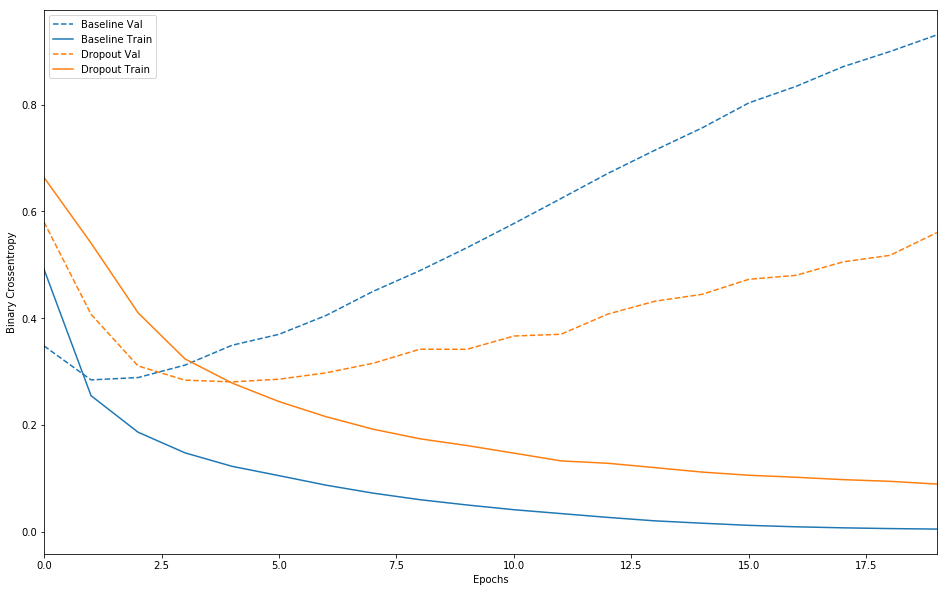

In [15]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])